In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (294 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.2MB 59kB/s 


In [3]:
import numpy as np
import easyocr
from pdf2image import convert_from_path
import PIL
from PIL import ImageDraw
import spacy
import pandas as pd

In [4]:
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
images=convert_from_path('/content/FlipkartInvoice.pdf')

In [7]:
#Conversion of the pdf into image file
for i in range(len(images)):
   
      # Save pages as images in the pdf
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

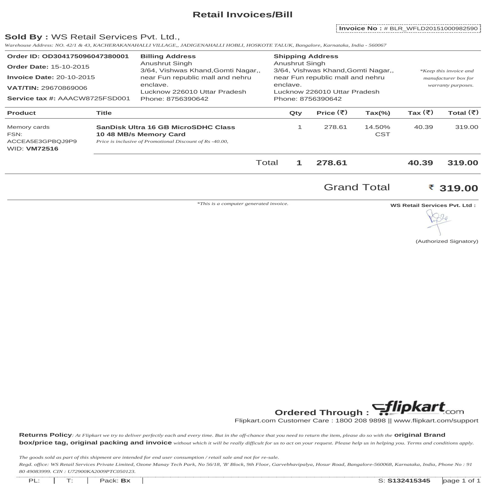

In [8]:
#printing the image by resizing it since the original image is quiet large.
im=PIL.Image.open('/content/page0.jpg')
resized_img = im. resize((500, 500))
resized_img

In [9]:
#returns bounding boxes 
bounds=reader.readtext(np.array(im))
bounds

[([[633, 47], [973, 47], [973, 89], [633, 89]],
  'Retail InvoicesIBill',
  0.8380386229710858),
 ([[1118, 118], [1252, 118], [1252, 148], [1118, 148]],
  'Invoice No',
  0.5607985890570801),
 ([[1266, 122], [1334, 122], [1334, 146], [1266, 146]],
  '#BLR',
  0.9999935492437295),
 ([[1342, 120], [1584, 120], [1584, 146], [1342, 146]],
  'WFLD2O151000982590',
  0.7488159053192701),
 ([[13, 155], [145, 155], [145, 197], [13, 197]],
  'Sold By',
  0.9999535537261546),
 ([[167, 154], [585, 154], [585, 191], [167, 191]],
  'WS Retail Services Pvt. Ltd.',
  0.4389718652073268),
 ([[16, 200], [1208, 200], [1208, 226], [16, 226]],
  'Warehouse Address: NO. 42/1 & 43, KACHERAKANAHALLI VILLAGE,, JADIGENAHALLI HOBLI, HOSKOTE TALUK, Bangalore, Karnataka, India',
  0.5967755823155929),
 ([[1217, 201], [1281, 201], [1281, 221], [1217, 221]],
  '560067',
  0.9999530847755864),
 ([[22, 250], [430, 250], [430, 278], [22, 278]],
  'Order ID: 0D304175096047380001',
  0.8049088941664435),
 ([[462, 250], [

In [10]:
def box(image,bounds,color='red',width=2):
  draw=ImageDraw.Draw(image)
  for b in bounds:
    a0,a1,a2,a3=b[0]
    draw.line([*a0,*a1,*a2,*a3,*a0],fill=color,width=width)

  return image

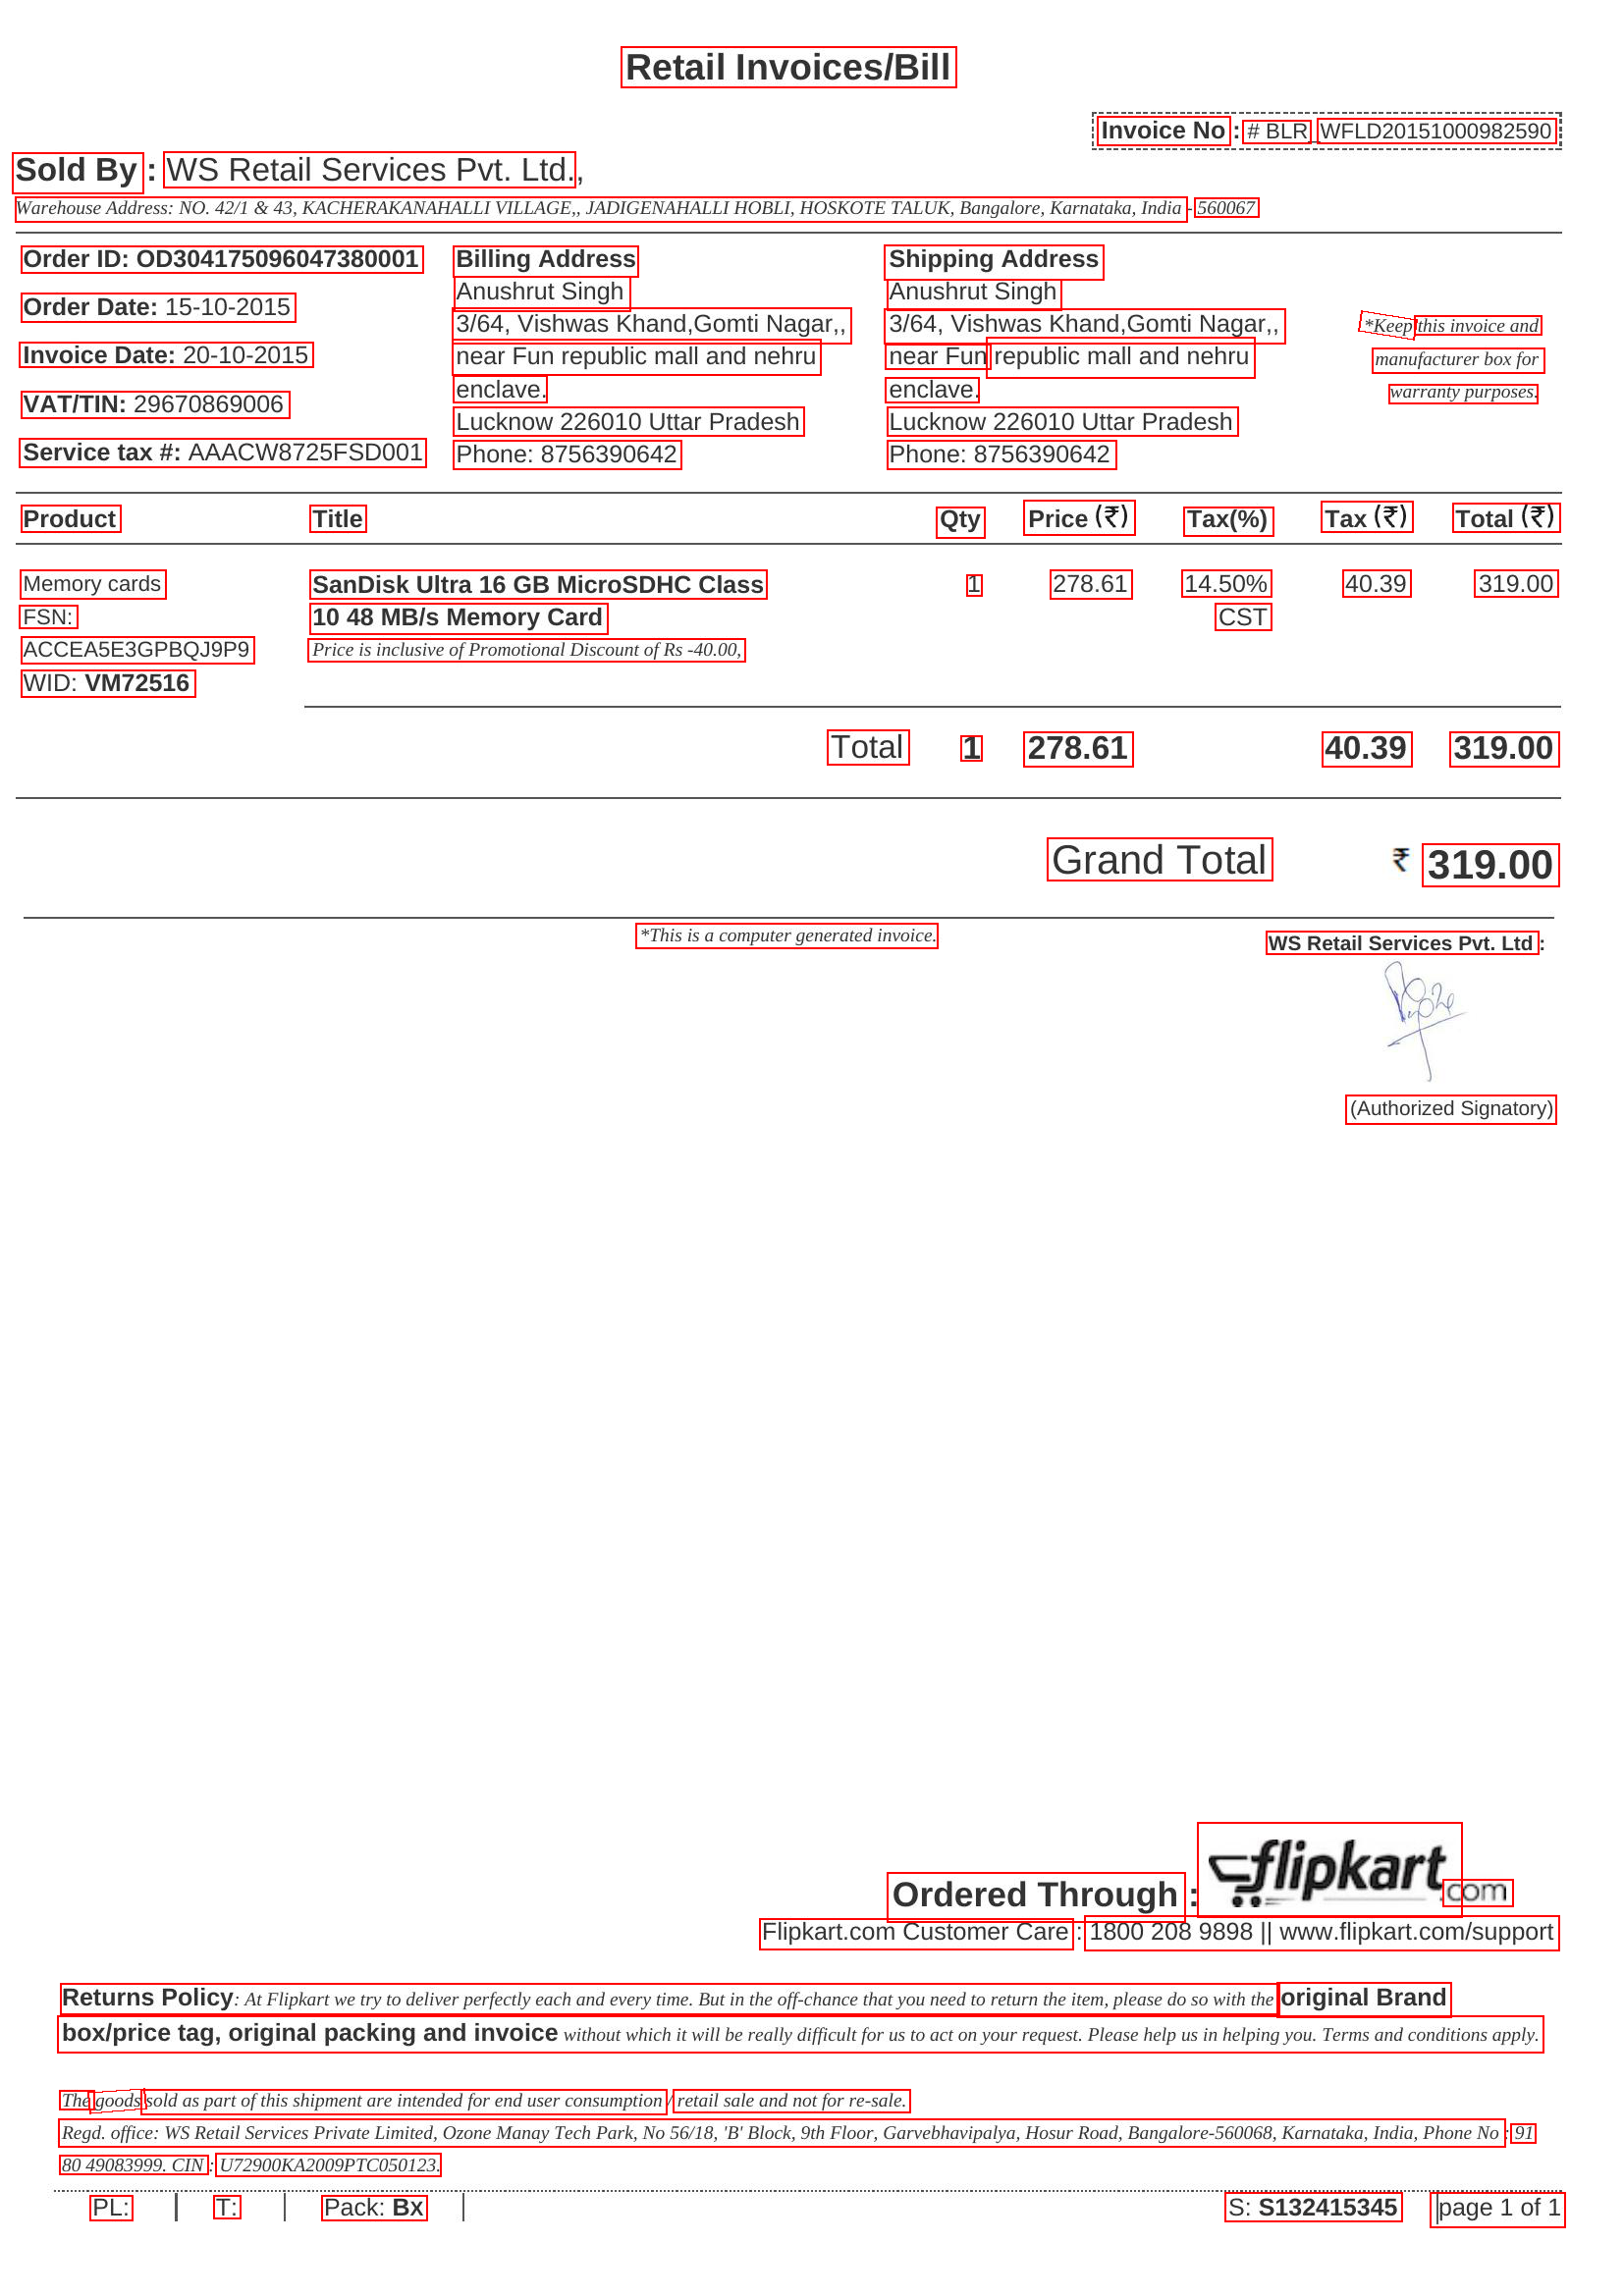

In [11]:
box(im,bounds)

In [12]:
print(type(bounds))


<class 'list'>


In [13]:
#This is  a way for extracting the company names but not a  right way for name entity recognition. Below you can find the name of the company after precossing the corpus
bounds[5][1]

'WS Retail Services Pvt. Ltd.'

In [14]:
#concatenation the strings into a single corpus
text=''
for i in range(len(bounds)):
  text+=bounds[i][1]+','
  
text


"Retail InvoicesIBill,Invoice No,#BLR,WFLD2O151000982590,Sold By,WS Retail Services Pvt. Ltd.,Warehouse Address: NO. 42/1 & 43, KACHERAKANAHALLI VILLAGE,, JADIGENAHALLI HOBLI, HOSKOTE TALUK, Bangalore, Karnataka, India,560067,Order ID: 0D304175096047380001,Billing Address,Shipping Address,Anushrut Singh,Anushrut Singh,Order Date: 15-10-2015,3/64, Vishwas Khand,Gomti Nagar,,,3/64, Vishwas Khand,Gomti Nagar,,,this invoice and,Invoice Date: 20-10-2015,near Fun republic mall and nehru,near Fun,republic mall and nehru,manufacturer box for,enclave.,enclave_,warranty purposes_,VATITIN: 29670869006,Lucknow 226010 Uttar Pradesh,Lucknow 226010 Uttar Pradesh,Service tax #: AAACW872SFSDOO1,Phone: 8756390642,Phone: 8756390642,Product,Title,Qty,Price (),Tax(%),Tax (?),Total (?),Memory cards,SanDisk Ultra 16 GB MicroSDHC Class,1,278.61,14.50%,40.39,319.00,FSN:,10 48 MBIs Memory Card,CST,ACCEASEBGPBQJIP9,Price is inclusive of Promotional Discount of Rs -40.00,,WID: VM72516,Total,1,278.61,40.39,319.00,

# **Name Entity Extraction**

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
#data preprocessing
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [17]:
sent = preprocess(text)
sent

[('Retail', 'NNP'),
 ('InvoicesIBill', 'NNP'),
 (',', ','),
 ('Invoice', 'NNP'),
 ('No', 'NNP'),
 (',', ','),
 ('#', '#'),
 ('BLR', 'NNP'),
 (',', ','),
 ('WFLD2O151000982590', 'NNP'),
 (',', ','),
 ('Sold', 'VBN'),
 ('By', 'IN'),
 (',', ','),
 ('WS', 'NNP'),
 ('Retail', 'NNP'),
 ('Services', 'NNPS'),
 ('Pvt', 'NNP'),
 ('.', '.'),
 ('Ltd.', 'NNP'),
 (',', ','),
 ('Warehouse', 'NNP'),
 ('Address', 'NNP'),
 (':', ':'),
 ('NO', 'NN'),
 ('.', '.'),
 ('42/1', 'CD'),
 ('&', 'CC'),
 ('43', 'CD'),
 (',', ','),
 ('KACHERAKANAHALLI', 'NNP'),
 ('VILLAGE', 'NNP'),
 (',', ','),
 (',', ','),
 ('JADIGENAHALLI', 'NNP'),
 ('HOBLI', 'NNP'),
 (',', ','),
 ('HOSKOTE', 'NNP'),
 ('TALUK', 'NNP'),
 (',', ','),
 ('Bangalore', 'NNP'),
 (',', ','),
 ('Karnataka', 'NNP'),
 (',', ','),
 ('India,560067', 'NNP'),
 (',', ','),
 ('Order', 'NNP'),
 ('ID', 'NNP'),
 (':', ':'),
 ('0D304175096047380001', 'CD'),
 (',', ','),
 ('Billing', 'NNP'),
 ('Address', 'NNP'),
 (',', ','),
 ('Shipping', 'NNP'),
 ('Address', 'NNP'),


In [18]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [19]:
chunks= nltk.ne_chunk(sent,binary=True)
for c in chunks:
  print(c)


(NE Retail/NNP InvoicesIBill/NNP)
(',', ',')
(NE Invoice/NNP No/NNP)
(',', ',')
('#', '#')
('BLR', 'NNP')
(',', ',')
(NE WFLD2O151000982590/NNP)
(',', ',')
('Sold', 'VBN')
('By', 'IN')
(',', ',')
(NE WS/NNP Retail/NNP Services/NNPS Pvt/NNP)
('.', '.')
('Ltd.', 'NNP')
(',', ',')
(NE Warehouse/NNP Address/NNP)
(':', ':')
('NO', 'NN')
('.', '.')
('42/1', 'CD')
('&', 'CC')
('43', 'CD')
(',', ',')
(NE KACHERAKANAHALLI/NNP VILLAGE/NNP)
(',', ',')
(',', ',')
(NE JADIGENAHALLI/NNP HOBLI/NNP)
(',', ',')
(NE HOSKOTE/NNP TALUK/NNP)
(',', ',')
(NE Bangalore/NNP)
(',', ',')
(NE Karnataka/NNP)
(',', ',')
('India,560067', 'NNP')
(',', ',')
(NE Order/NNP)
('ID', 'NNP')
(':', ':')
('0D304175096047380001', 'CD')
(',', ',')
(NE Billing/NNP Address/NNP)
(',', ',')
(NE Shipping/NNP Address/NNP)
(',', ',')
(NE Anushrut/NNP Singh/NNP)
(',', ',')
(NE Anushrut/NNP Singh/NNP)
(',', ',')
(NE Order/NNP Date/NNP)
(':', ':')
('15-10-2015,3/64', 'JJ')
(',', ',')
(NE Vishwas/NNP Khand/NNP)
(',', ',')
(NE Gomti/NNP Na

In [20]:
import spacy 
from spacy import displacy
#SpaCy 2.x brough significant speed and accuracy improvements
spacy.__version__

'2.2.4'

**Extracting invoice date and invoice  amount using Regular expression method**

In [21]:
#Regex for extracting Invoice date is "Invoice Date: [\d]{1,2}-[\d]{1,2}-[\d]{4}"
#I used regex method for finding the invoice date
import re
print(re.findall(r'Invoice Date: [\d]{1,2}-[\d]{1,2}-[\d]{4}', text))
print(re.findall(r'Grand Total.*', text))

['Invoice Date: 20-10-2015']
["Grand Total,319.00,#This is @ computer generated invoice.,WS Retail Services Pvt: Ltd,(Authorized Signatory),Ordered Through,=flipkart,com,Flipkart.com Customer Care,1800 208 9898 |l www flipkart com/support,Returns Policy: At Flipkart we try to deliver perfectly each and every time. But in the off-chance that you need to return the item, please do so with the,original Brand,boxlprice tag, original packing and invoice without which it will be really difficult for us to act on your request Please help US in helping you: Terms and conditions apply:,The,sold as part of this shipment are intended for end user consumption,retail sale and not for re-sale:,Regd. office: WS Retail Services Private Limited, Ozone Manay Tech Park; No 56/18, 'B' Block; 9th Floor, Garvebhavipalya, Hosur Road, Bangalore-560068, Karnataka, India, Phone No,91,80 49083999. CIN,UZ2900KAZOOIPTCO50123.,PL:,T:,Pack: Bx,S: S132415345,Ipage 1 of 1,#Keep,goods,"]


In [22]:
nlp = spacy.load("en_core_web_sm")

**Extracting Company or Organization name using spacy library**

In [23]:
#The name entity(NE) for finding the Company name  which comes under the label ORG which represents Companies, agencies, institutions, etc.
doc = nlp(text)

entities = []
labels = []
for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels})

df

,Entities,Labels
0,"(WS, Retail, Services, Pvt, .)",ORG
1,"(&, 43)",DATE
2,"(KACHERAKANAHALLI, VILLAGE)",GPE
3,"(JADIGENAHALLI, HOBLI)",PERSON
4,(TALUK),PERSON
5,(Bangalore),GPE
6,(Karnataka),GPE
7,"(0D304175096047380001,Billing)",CARDINAL
8,"(Shipping, Address)",PERSON
9,"(Anushrut, Singh)",PERSON


In [24]:
df.iloc[0]

Entities    (WS, Retail, Services, Pvt, .)
Labels                                 ORG
Name: 0, dtype: object

In [25]:
spacy.explain("FAC")

'Buildings, airports, highways, bridges, etc.'

In [26]:
df['Labels'].unique()

array(['ORG', 'DATE', 'GPE', 'PERSON', 'CARDINAL', 'FAC', 'EVENT',
       'PRODUCT', 'ORDINAL'], dtype=object)